In [1]:
from NMR_ML import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the dataset object
gaussian_data = Dataset(data_directory_path="..//..//work//data//2021-08-14_gauss/")
powerlaw_data = Dataset(data_directory_path="..//..//work//data//2021-08-14_power/")
rkky_data = Dataset(data_directory_path="..//..//work//data//2021-08-14_RKKY/")

In [3]:
# Load the raw timeseries from the respective NMR simulation output directory
rawdata_gaussian = gaussian_data.load_data()
rawdata_powerlaw = powerlaw_data.load_data()
rawdata_rkky = rkky_data.load_data()

Finished loading rawdata into numpy array
Finished loading rawdata into numpy array
Finished loading rawdata into numpy array


In [4]:
# Show a sample dataset
print(rawdata_rkky.shape)
print(rawdata_rkky[:5,:10])

(5000, 1885)
[[0.500027   0.49815004 0.4927322  0.48422356 0.47331324 0.46083635
  0.44763789 0.43448173 0.42195653 0.41042686]
 [0.500027   0.4982471  0.49310235 0.48500764 0.47459685 0.46263489
  0.44990978 0.43713459 0.42486639 0.41346226]
 [0.500027   0.49815102 0.49273807 0.48423716 0.4733393  0.4608675
  0.44766478 0.43448217 0.42189071 0.41023745]
 [0.500027   0.49811626 0.49260181 0.48394515 0.47285594 0.46018232
  0.44679001 0.43345196 0.42075771 0.40906096]
 [0.500027   0.49814604 0.49271514 0.48418623 0.47324927 0.46073624
  0.44749515 0.43429906 0.42173901 0.41018901]]


In [6]:
# Load other metadata from the NMR simulation output for the Gaussian dataset

params = gaussian_data.load_params()
kers = gaussian_data.load_wlist()
y_classes  = gaussian_data.get_yclasses()
rescaled_df, echo_pulse = gaussian_data.get_window(rawdata_gaussian, center_ratio=2/3, width=150)

Finished loading parameters file
Finished loading kernel-integrals file.
Finished loading parameters file
Finished loading kernel-integrals file.
The Echo pulse occurs at timestep: 1256


In [7]:
echo_pulse

1256

In [8]:
print("Raw timeseries data shape:", rawdata_gaussian.shape)
print("Rescaled timeseries data shape:", rescaled_df.to_numpy().shape)

Raw timeseries data shape: (5000, 1885)
Rescaled timeseries data shape: (5000, 300)


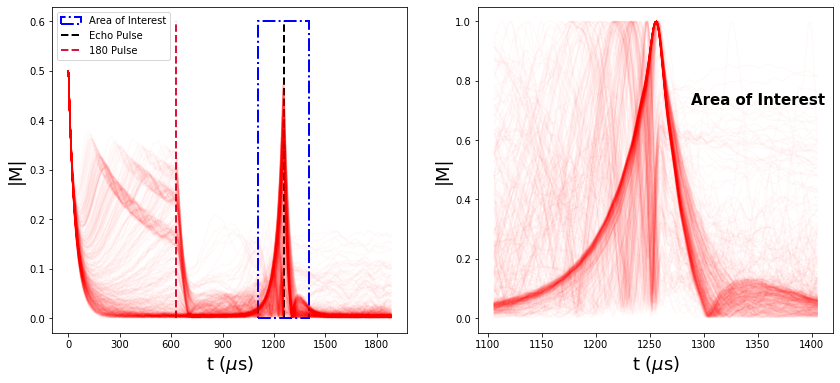

In [10]:
# Plotting the results of the simulation
# Here we plot every 10th curve obtained from the simulation for the Gaussian Kernel type

from matplotlib.patches import Rectangle

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

ax1.plot(rawdata_gaussian[:,:-1][::10].T, 'red', alpha=0.02)

rect = Rectangle((echo_pulse-150, 0), 300, 0.6, linewidth=1,
                             edgecolor='b', facecolor='none', ls='-.', lw=2,
                             label='Area of Interest')
ax1.add_patch(rect)
ax1.vlines(x=echo_pulse,color='k',ymin=0,ymax=0.6, ls='--', lw=2, label='Echo Pulse')
ax1.vlines(x=echo_pulse/2,ymin=0,ymax=0.6,color='crimson', ls='--', lw=2, label='180 Pulse')
ax1.set(xticks= np.arange(0,1885,300))
ax1.set_xlabel(r"t ($\mu$s)", fontsize=18)
ax1.set_ylabel("|M|", fontsize=18)
ax1.legend(loc="upper left", prop={'size':10})


# Plot region of interest for Machine Learning analysis

ax2.plot(np.arange(echo_pulse-150, echo_pulse+150), 
             rescaled_df.to_numpy()[::10].T, 'red', alpha=0.02)

ax2.set_xlabel(r"t ($\mu$s)", fontsize=18)
ax2.set_ylabel("|M|", fontsize=18)
ax2.text(0.6,0.7,"Area of Interest",transform=ax2.transAxes, fontsize=15, fontweight='bold')

plt.show()